In [7]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from stompy.grid import unstructured_grid
import stompy.model.delft.dflow_model as dfm

%matplotlib notebook

In [48]:
# Sophie's run:
#run_dir="/media/cws/hydro/Pescadero/Model_Runs/Testing/run_tide_test-v107"
#his_fn=run_dir+"/DFM_OUTPUT_flowfm/flowfm_his.nc"

# My run that is maybe similar:
run_dir="data_mouth_v017"
his_fn=run_dir+"/DFM_OUTPUT_flowfm/flowfm_0000_his.nc"

In [49]:

his_ds=xr.open_dataset(his_fn)

FileNotFoundError: [Errno 2] No such file or directory: b'/opt2/pescadero/model/model/data_mouth_v017/DFM_OUTPUT_flowfm/flowfm_0000_his.nc'

In [6]:
his_ds

<xarray.Dataset>
Dimensions:                                  (cross_section: 30, cross_section_geom_nNodes: 327, gategen_geom_nNodes: 18, gategens: 3, general_structure_geom_nNodes: 35, general_structures: 2, nFlowElemContourPts: 4, nFlowElemWithBnd: 71878, nFlowLink: 114574, nFlowLinkPts: 2, nNetLink: 116116, nNetLinkPts: 2, station_geom_nNodes: 1545, stations: 1545, time: 385)
Coordinates:
    station_x_coordinate                     (stations) float64 ...
    station_y_coordinate                     (stations) float64 ...
    station_name                             (stations) |S256 ...
    cross_section_name                       (cross_section) |S256 ...
    general_structure_id                     (general_structures) |S256 ...
    gategen_name                             (gategens) |S256 ...
  * time                                     (time) datetime64[ns] 2016-12-10...
Dimensions without coordinates: cross_section, cross_section_geom_nNodes, gategen_geom_nNodes, gategens, general_structure_geom_nNodes, general_structures, nFlowElemContourPts, nFlowElemWithBnd, nFlowLink, nFlowLinkPts, nNetLink, nNetLinkPts, station_geom_nNodes, stations
Data variables:
    FlowElem_xcc                             (nFlowElemWithBnd) float64 ...
    FlowElem_ycc                             (nFlowElemWithBnd) float64 ...
    FlowElem_zcc                             (nFlowElemWithBnd) float64 ...
    FlowElem_bac                             (nFlowElemWithBnd) float64 ...
    FlowElem_xzw                             (nFlowElemWithBnd) float64 ...
    FlowElem_yzw                             (nFlowElemWithBnd) float64 ...
    FlowElemContour_x                        (nFlowElemWithBnd, nFlowElemContourPts) float64 ...
    FlowElemContour_y                        (nFlowElemWithBnd, nFlowElemContourPts) float64 ...
    FlowElem_bl                              (nFlowElemWithBnd) float64 ...
    ElemLink                                 (nNetLink, nNetLinkPts) int32 ...
    FlowLink                                 (nFlowLink, nFlowLinkPts) int32 ...
    FlowLinkType                             (nFlowLink) int32 ...
    FlowLink_xu                              (nFlowLink) float64 ...
    FlowLink_yu                              (nFlowLink) float64 ...
    projected_coordinate_system              int32 ...
    FlowLink_lonu                            (nFlowLink) float64 ...
    FlowLink_latu                            (nFlowLink) float64 ...
    station_id                               (stations) |S256 ...
    station_geom                             int32 ...
    station_geom_node_count                  (stations) int32 ...
    station_geom_node_coordx                 (station_geom_nNodes) float64 ...
    station_geom_node_coordy                 (station_geom_nNodes) float64 ...
    waterlevel                               (time, stations) float64 ...
    bedlevel                                 (stations) float64 ...
    x_velocity                               (time, stations) float64 ...
    y_velocity                               (time, stations) float64 ...
    taus                                     (time, stations) float64 ...
    cross_section_geom                       int32 ...
    cross_section_geom_node_count            (cross_section) int32 ...
    cross_section_geom_node_coordx           (cross_section_geom_nNodes) float64 ...
    cross_section_geom_node_coordy           (cross_section_geom_nNodes) float64 ...
    cross_section_discharge                  (time, cross_section) float64 ...
    cross_section_cumulative_discharge       (time, cross_section) float64 ...
    cross_section_area                       (time, cross_section) float64 ...
    cross_section_velocity                   (time, cross_section) float64 ...
    water_balance_total_volume               (time) float64 ...
    water_balance_storage                    (time) float64 ...
    water_balance_volume_error               (time) float64 ...
    water_balance_boun

In [8]:
model=dfm.DFlowModel.load(run_dir)

In [11]:
model.structures

[{'type': 'gate',
  'id': 'pch_gate',
  'polylinefile': 'pch_gate.pli',
  'GateHeight': '1.5',
  'GateLowerEdgeLevel': '1.7',
  'GateOpeningWidth': '0.0',
  'CrestLevel': '0.5',
  'CrestWidth': '5.6548799999999995',
  'geom': array([[ 552582.0148888 , 4124430.34799077],
         [ 552587.25355405, 4124429.37786757],
         [ 552591.13404684, 4124428.98981829],
         [ 552594.88518986, 4124428.47241925],
         [ 552598.18360873, 4124428.21371974]])},
 {'type': 'gate',
  'id': 'nmc_gate',
  'polylinefile': 'nmc_gate.pli',
  'GateHeight': '1.0',
  'GateLowerEdgeLevel': '1.4',
  'GateOpeningWidth': '0.0',
  'CrestLevel': '1.2',
  'CrestWidth': '0.3',
  'geom': array([[ 552438.43665581, 4124714.98213643],
         [ 552437.91925677, 4124731.53890564]])},
 {'type': 'gate',
  'id': 'nm_ditch_gate',
  'polylinefile': 'nm_ditch_gate.pli',
  'GateHeight': '1.0',
  'GateLowerEdgeLevel': '1.4',
  'GateOpeningWidth': '0.0',
  'CrestLevel': '1.2',
  'CrestWidth': '0.3',
  'geom': array([[ 55

In [32]:
map_ds=xr.open_dataset(run_dir+"/DFM_OUTPUT_flowfm/flowfm_map.nc")
grid=unstructured_grid.UnstructuredGrid.read_ugrid(map_ds)

In [33]:
grid.cells

array([([-99, -99, -99, -99], [    4,     0,     1, 44277], [ 554063.95651599, 4123254.34051287], 0, nan, False, [554061.80623826, 554060.88838938, 554066.06164366, 554067.06625013], [4123256.65395157, 4123255.08432303, 4123251.98029609, 4123253.64289308],  11.36966197, 0.        ),
       ([-99, -99, -99, -99], [    0,     2,     3,     1], [ 554062.95008443, 4123252.66798376], 0, nan, False, [554060.88838938, 554059.860724  , 554064.94605013, 554066.06164366], [4123255.08432303, 4123253.38340529, 4123250.2074647 , 4123251.98029609],  12.27383279, 0.        ),
       ([-99, -99, -99, -99], [    9,     5,     0,     4], [ 554058.7576608 , 4123257.36352403], 0, nan, False, [554056.57930732, 554055.72782409, 554060.88838938, 554061.80623826], [4123259.58515722, 4123258.0940197 , 4123255.08432303, 4123256.65395157],  10.57628127, 0.        ),
       ...,
       ([-99, -99, -99, -99], [44268, 44267, 44270, 44272], [ 552454.08351501, 4125350.95046292], 0, nan, False, [552442.54653062, 55246

<IPython.core.display.Javascript object>


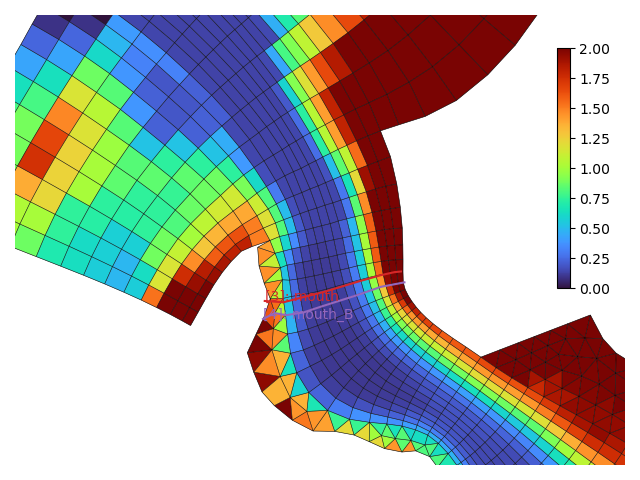

In [37]:
# Find reasonable structure to look at:
fig=plt.figure()
grid.plot_edges(color='k',lw=0.4)
ccoll=grid.plot_cells(values=grid.cells['mesh2d_flowelem_bl'],cmap='turbo',clim=[0,2])
plt.axis('tight')
plt.axis('equal')
plt.axis('off')

for i,struct in enumerate(model.structures):
    ls=struct['geom']
    lines=plt.plot(ls[:,0],ls[:,1])
    plt.text( ls[0,0],ls[0,1],f"[{i}]: {struct['id']}",
             color=lines[0].get_color())

fig.tight_layout()
plt.axis((551992.9099230398, 552207.381984984, 4124583.192877078, 4124741.4099719548))
cax=fig.add_axes([0.87,0.4,0.02,0.5])
plt.colorbar(ccoll,cax=cax)

In [35]:
plt.axis()

(551992.9099230398, 552207.381984984, 4124583.192877078, 4124741.4099719548)

In [16]:
# 3: mouth and 4: mouth_B are the ones to look at.
# They are the only general_structures in the history file
gs_i=1

gs_vars=[v for v in his_ds.variables if 'general_structures' in his_ds[v].dims]
gs_vars

# crest_level, s1up,s1dn, head, flow_area, velocity
# How to get a Froude number?
# crest_width I think is in the flow direction

['general_structure_id',
 'general_structure_geom_node_count',
 'general_structure_discharge',
 'general_structure_crest_level',
 'general_structure_crest_width',
 'general_structure_gate_lower_edge_level',
 'general_structure_gate_opening_width',
 'general_structure_s1up',
 'general_structure_s1dn',
 'general_structure_head',
 'general_structure_flow_area',
 'general_structure_velocity']

<IPython.core.display.Javascript object>


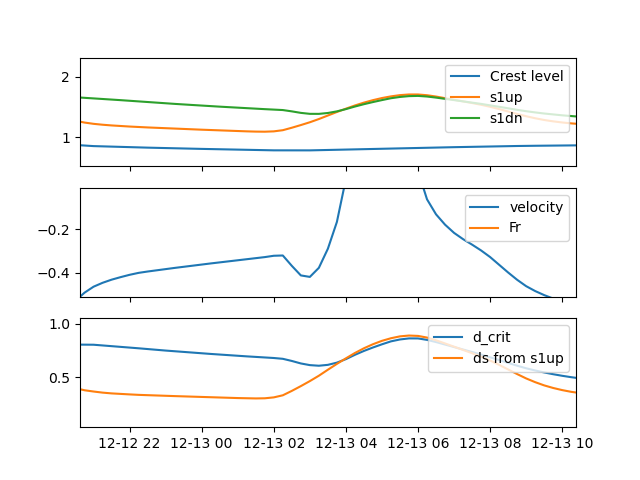

/opt/anaconda3/envs/general/lib/python3.9/site-packages/xarray/core/computation.py:724: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


(17147.711364063103,
 17148.740337798197,
 0.5193483301551929,
 2.3215709276583665)

In [45]:
fig,axs=plt.subplots(3,1,sharex=True)
# For structure 0, this theory doesn't hold. Does look like
# flow was critical over structure 0 for a brief moment right
# when the system started to open. Fr=0.82 is what shows up,
# but they behavior looks like critical flow over a weir.
# Froude number is mostly around 0.2 after that.
# For structure 1 (ocean side), also doesn't hold. A short
# period at the start of breach suggests critical flow with
# estimate Fr=0.53 or so.
# Most telling is that right around this flow feature where the
# velocity rises a bit right when the tide is coming back in
# corresponds to the downstream water level actually dipping
# a bit. 

gs=his_ds.isel(general_structures=0)

axs[0].plot(gs.time, gs['general_structure_crest_level'], label='Crest level')
axs[0].plot(gs.time, gs['general_structure_s1up'], label='s1up')
axs[0].plot(gs.time, gs['general_structure_s1dn'], label='s1dn')
# axs[0].plot(gs.time, gs['general_structure_head'], label='head')
axs[1].plot(gs.time, gs['general_structure_velocity'],label='velocity')

# Trying to come up with the same sort of values as dfm
vel_upstream=gs['general_structure_velocity'] # clearly wrong..
vel_hght=vel_upstream**2/(2*9.8)
elu=gs['general_structure_s1dn']+vel_hght
d_crit=elu-gs['general_structure_crest_level']
ds_min=gs['general_structure_s1up']-gs['general_structure_crest_level']

axs[2].plot(gs.time,d_crit,label='d_crit')
axs[2].plot(gs.time,ds_min,label='ds from s1up')

h=np.maximum(gs['general_structure_s1up'],gs['general_structure_s1dn']) - gs['general_structure_crest_level']
Fr=np.abs(gs['general_structure_velocity']) / np.sqrt(9.8*h)
axs[1].plot(gs.time,Fr,label='Fr')
axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')
axs[2].legend(loc='upper right')
axs[0].axis((17147.711364063103, 17148.740337798197, 0.5193483301551929, 2.3215709276583665))

In [23]:
axs[0].axis()

(17147.711364063103,
 17148.740337798197,
 0.5193483301551929,
 2.3215709276583665)